In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
xyrange = [-0.15, 2.15]
x = np.arange(xyrange[0], xyrange[1], 1/1000)
y = np.arange(xyrange[0], xyrange[1], 1/1000)

rho = 4

X,Y = np.meshgrid(x,y)
Z1 = (X-1)*(X-1) + (Y-1)*(Y - 1) + rho*X*Y

xaxis_x = [0, xyrange[1]]
xaxis_y = [0, 0]

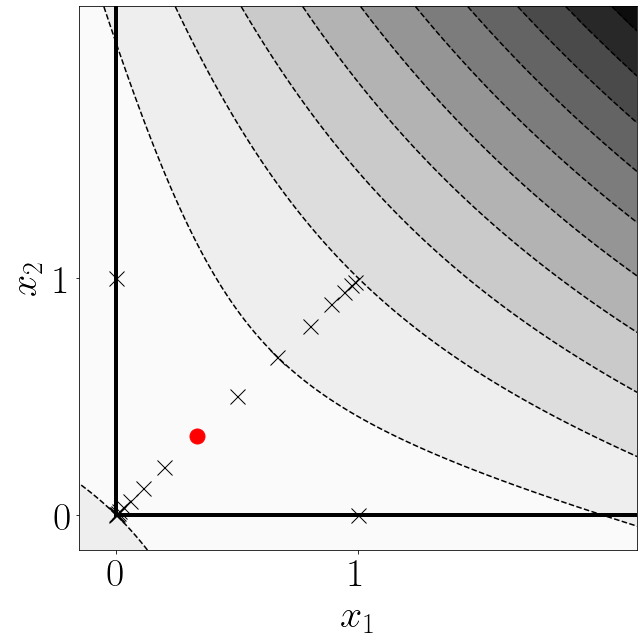

In [6]:
# Use latex
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 40
})

# Create figure
fig, ax = plt.subplots(figsize= (10,10))

# Number of level lines to be plotted
levels = 12

plt.contourf(X,Y,Z1, cmap = 'Greys', levels=levels)
CS = ax.contour(X,Y,Z1, colors='k', linestyles =  'dashed', levels=levels )
plt.plot(xaxis_x, xaxis_y, 'k-', linewidth = 4)
plt.plot(xaxis_y, xaxis_x, 'k-', linewidth = 4)
plt.plot([1, 0, 0], [0, 1, 0], 'kx', markersize = 15)

rhok = pow(2.0, -6)
while rhok < 10e2:
    rhok = rhok*2;

    if rho == rhok:
        continue

    plt.plot(2.0/(2+rhok), 2.0/(2+rhok), 'kx', markersize = 15)

plt.plot(2.0/(2 + rho), 2.0/(2 + rho), color="red", marker="o", markersize=15)

# Load sample paths
x_sample_1 = np.loadtxt("x1.txt")
y_sample_1 = np.loadtxt("x2.txt")
x_sample_2 = np.loadtxt("x1_2.txt")
y_sample_2 = np.loadtxt("x2_2.txt")

# plt.plot(x_sample_1, y_sample_1, 'b-', alpha=0.4, linewidth = 2)
# plt.plot(x_sample_2, y_sample_2, 'b-', alpha=0.4, linewidth = 2)

# Ticks and labels
plt.xticks(np.arange(0, 2, step=1))
plt.yticks(np.arange(0, 2, step=1))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10)
plt.xlim(xyrange)
plt.ylim(xyrange)

# Export to pdf and svg
fig.savefig(r'warm_up_penalty_contour_%d.png' % rho, format='png', bbox_inches='tight')